# Load Data

In [3]:
import os
import json
import pandas as pd

# constants
BASE_DIR = "C://Users/mrx379/Documents/GitHub/ct16_cap1_ds5/project_1/data"
MOJO_DIR = os.path.join(BASE_DIR, 'boxofficemojo')
META_DIR = os.path.join(BASE_DIR, 'metacritic')

# Create DataFrame

movies = []

NameList = [name for name in os.listdir(MOJO_DIR) if ".json" in name] 
# to avoid any non json file related failure

for i in NameList:
    target_file_path = os.path.join(MOJO_DIR, i)
    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)
        movies.append(movie)

mojo_movies_df = pd.DataFrame(movies)

NameList = [name for name in os.listdir(META_DIR) if ".json" in name] 
movies = []

for i in NameList:
    target_file_path = os.path.join(META_DIR, i)
    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)
        if type(movie) is not dict:
            continue
        else:
            movies.append(movie)

meta_movies_df = pd.DataFrame(movies)

# Clean Data

In [4]:
mojo_movies_df['title_cln'] = mojo_movies_df['title']
meta_movies_df['title_cln'] = meta_movies_df['title']

def clean(dataframe, columnname):
    dataframe[columnname].replace("\\.", "",inplace=True, regex = True)
    dataframe[columnname].replace(",", "",inplace=True, regex = True)
    dataframe[columnname].replace(":", "",inplace=True, regex = True)
    dataframe[columnname].replace("'", "",inplace=True, regex = True)
    dataframe[columnname].replace("!", "",inplace=True, regex = True)
    dataframe[columnname].replace("-", "",inplace=True, regex = True)
    dataframe[columnname].replace("\\?", "",inplace=True, regex = True)
    dataframe[columnname].replace("\([^)]*\)", "",inplace=True, regex = True)
    dataframe[columnname].replace(" ", "",inplace=True, regex = True)
    dataframe[columnname]= dataframe[columnname].str.lower()
    
clean(mojo_movies_df, 'title_cln')
clean(meta_movies_df, 'title_cln')

mojo_clean = mojo_movies_df[pd.notnull(mojo_movies_df['title_cln'])]
meta_clean = meta_movies_df[pd.notnull(meta_movies_df['title_cln'])]

movie_db = pd.merge(mojo_clean, meta_clean, on = 'title_cln', suffixes = ('_mojo', '_meta'), how = 'outer')

keepers = ['domestic_gross', 'opening_per_theater', 'opening_weekend_take', 'production_budget', 'title_cln', 'widest_release', 
           'worldwide_gross', 'year_meta', 'year_mojo', 'director_meta', 'genre', 'metascore', 'num_critic_reviews', 'num_user_ratings',
           'num_user_reviews', 'rating', 'release_date', 'runtime_minutes', 'studio', 'user_score']

movie_final = movie_db[keepers]


In [3]:
movie_final.isnull().sum()

domestic_gross          1225
opening_per_theater     1333
opening_weekend_take    1333
production_budget       3313
title_cln                  0
widest_release          1305
worldwide_gross         2069
year_meta                153
year_mojo               1157
director_meta            153
genre                    153
metascore                328
num_critic_reviews       153
num_user_ratings         435
num_user_reviews         153
rating                   153
release_date             153
runtime_minutes          248
studio                   191
user_score               153
dtype: int64

In [4]:
list(movie_final) 

[u'domestic_gross',
 u'opening_per_theater',
 u'opening_weekend_take',
 u'production_budget',
 'title_cln',
 u'widest_release',
 u'worldwide_gross',
 u'year_meta',
 u'year_mojo',
 u'director_meta',
 u'genre',
 u'metascore',
 u'num_critic_reviews',
 u'num_user_ratings',
 u'num_user_reviews',
 u'rating',
 u'release_date',
 u'runtime_minutes',
 u'studio',
 u'user_score']

In [5]:
movie_final.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year_mojo,metascore,num_user_ratings,runtime_minutes
count,3.694000e+03,3586.000000,3.586000e+03,1.606000e+03,3614.000000,2.850000e+03,3762.000000,4591.000000,4484.000000,4671.000000
mean,3.574326e+07,7752.573898,8.886941e+06,4.593457e+07,1355.833149,9.088366e+07,2004.700957,57.109344,129.322926,107.143438
std,5.641706e+07,8218.694122,1.399460e+07,4.055533e+07,1292.648450,1.484816e+08,9.139566,18.622609,235.739859,20.139545
min,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,1933.000000,1.000000,4.000000,40.000000
25%,6.288795e+05,3214.250000,4.749975e+04,1.650000e+07,51.000000,5.591251e+06,2001.000000,44.000000,21.000000,93.000000
50%,1.317841e+07,5512.500000,3.307413e+06,3.500000e+07,1057.500000,3.548533e+07,2007.000000,58.000000,56.000000,103.000000
75%,4.947995e+07,9428.750000,1.261307e+07,6.500000e+07,2577.750000,1.160275e+08,2011.000000,71.000000,136.000000,117.000000
max,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4468.000000,2.787965e+09,2015.000000,100.000000,4002.000000,325.000000


# Prepare for modleing
--Subset columns for modeling
- missing imputation for X
- drop missing Y

In [9]:
features = ['widest_release',
            'metascore',
            'runtime_minutes']

#opening_weekend_take, opening_per_theater

movie_model_1=movie_final.fillna(movie_final.mean()[features])
 
related_columns = features + ['domestic_gross']

movie_model_1 = movie_model_1[related_columns].dropna() 



In [15]:
movie_model_1.isnull().sum()

opening_per_theater     0
opening_weekend_take    0
widest_release          0
metascore               0
runtime_minutes         0
domestic_gross          0
dtype: int64

In [16]:
movie_model_1.describe()

,opening_per_theater,opening_weekend_take,widest_release,metascore,runtime_minutes,domestic_gross
count,3694.000000,3.694000e+03,3694.000000,3694.000000,3694.000000,3.694000e+03
mean,7752.573898,8.886941e+06,1355.833149,57.740075,107.483634,3.574326e+07
std,8097.626545,1.378844e+07,1278.570726,17.587208,18.967343,5.641706e+07
min,72.000000,7.200000e+01,1.000000,1.000000,40.000000,7.200000e+01
25%,3298.500000,5.078075e+04,54.250000,46.000000,94.000000,6.288795e+05
50%,5675.000000,3.733336e+06,1136.500000,57.109344,105.000000,1.317841e+07
75%,9262.750000,1.220687e+07,2560.250000,71.000000,116.000000,4.947995e+07
max,204230.000000,1.741446e+08,4468.000000,100.000000,325.000000,7.605076e+08


# Build a model

In [10]:
import statsmodels.api as sm
Y = movie_model_1['domestic_gross']
X = sm.add_constant(movie_model_1[features])
model_1 = sm.OLS(Y, X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1244.
Date:                Fri, 13 May 2016   Prob (F-statistic):               0.00
Time:                        00:09:52   Log-Likelihood:                -69882.
No. Observations:                3694   AIC:                         1.398e+05
Df Residuals:                    3690   BIC:                         1.398e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const           -8.019e+07   4.12e+06    -19.484      0.000     -8.83e+07 -7.21e+07
widest_release   3.176e+04    543.215     58.466      0.000      3.07e+04  3.28e+04
metascore        7.262e+05   4.02e+04     18.043      0.000      6.47e+05  8.05e+05
runtime_minutes  2.879e+05   3.58e+04      8.052      0.000      2.18e+05  3.58e+05
==============================================================================
Omnibus:                     3455.497   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251395.857
Skew:                           4.259   Prob(JB):                         0.00
Kurtosis:                      42.506   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
import numpy as np 
Y = np.log(movie_model_1.domestic_gross)
X = sm.add_constant(movie_model_1[features])
model_log_y = sm.OLS(Y, X).fit()
model_log_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     2696.
Date:                Fri, 13 May 2016   Prob (F-statistic):               0.00
Time:                        00:10:01   Log-Likelihood:                -7033.2
No. Observations:                3694   AIC:                         1.407e+04
Df Residuals:                    3690   BIC:                         1.410e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               9.5567      0.168     56.857      0.000         9.227     9.886
widest_release      0.0019   2.22e-05     86.587      0.000         0.002     0.002
metascore           0.0298      0.002     18.149      0.000         0.027     0.033
runtime_minutes     0.0142      0.001      9.697      0.000         0.011     0.017
==============================================================================
Omnibus:                      308.939   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.401
Skew:                          -0.652   Prob(JB):                    8.70e-102
Kurtosis:                       4.151   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

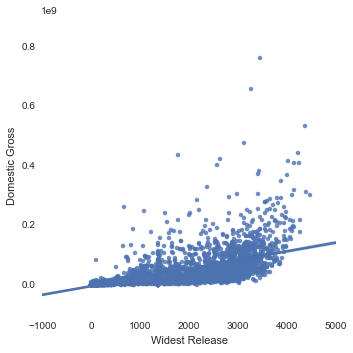

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('widest_release', 'domestic_gross', 
           data=movie_model_1, 
           fit_reg=True) 
plt.xlabel('Widest Release')
plt.ylabel('Domestic Gross')

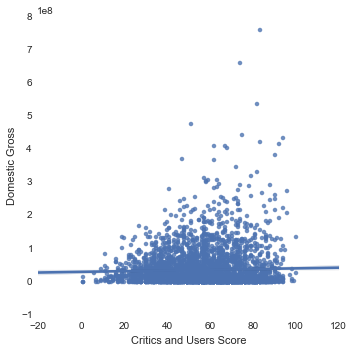

In [20]:
sns.lmplot('metascore', 'domestic_gross', 
           data=movie_model_1, 
           fit_reg=True) 
plt.xlabel('Critics and Users Score')
plt.ylabel('Domestic Gross')

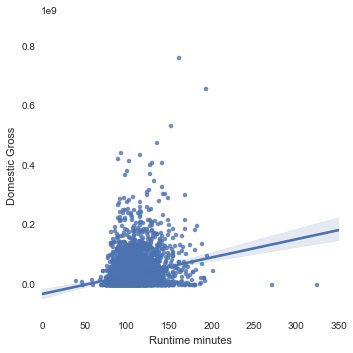

In [22]:
sns.lmplot('runtime_minutes', 'domestic_gross', 
           data=movie_model_1, 
           fit_reg=True) 
plt.xlabel('Runtime minutes')
plt.ylabel('Domestic Gross')

In [ ]:
features = ['opening_per_theater',
            'opening_weekend_take',
            'widest_release',
            'metascore',
            'runtime_minutes']


related_columns = features + ['domestic_gross']


print related_columns

In [ ]:
# build the model
import statsmodels.api as sm
Y = clean_top_dir_movies['domestic_gross']
X = sm.add_constant(clean_top_dir_movies[features])
director_model = sm.OLS(Y, X).fit()
director_model.summary()